C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


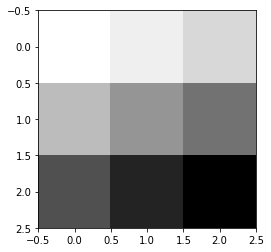

In [32]:
# cnn_basic.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()
#
# a = tf.constant(10)
# b = tf.constant(20)
# add_node = tf.add(a,b)
#
# print(add_node.eval())
# print(sess.run(add_node))

image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image)
print(image.shape)  # (1,3,3,1)
plt.imshow(image.reshape(3,3),cmap='Greys')
print(image.reshape(3,3))
plt.show()

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


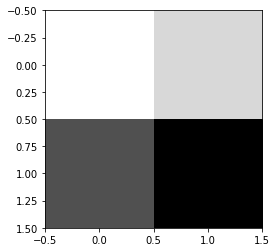

In [2]:
# CNN(Convolutional Neural Network)
# conv2d layer   , filter (2,2,1,1)
#  출력 이미지 = (N - F)/stride  + 1

# image (1,3,3,1)
# 1 : 이미지의 갯수
# 3 : 가로 픽셀수
# 3 : 세로 픽셀 수
# 1 : color, Greyscale = 1

# filter (2,2,1,1)
# 2 : 가로 갯수
# 2 : 세로 갯수
# 1 : color
# 1 : filter의 갯수
#
# 출력 이미지 = (3 - 2)/1 + 1 = 2, zero padding을 안했을 때
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
conv2d_img = conv2d.eval()
print(conv2d_img)  # (1,2,2,1)
plt.imshow(conv2d_img.reshape(2,2),cmap='Greys')
plt.show()

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]


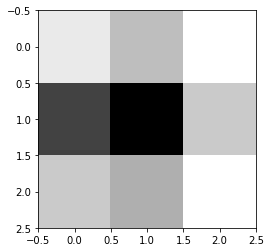

In [3]:
# 출력 이미지 = (3+1 - 2)/1 + 1 = 3, zero padding을 했을 때(padding='SAME')
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img)  # (1,3,3,1)
plt.imshow(conv2d_img.reshape(3,3),cmap='Greys')
plt.show()

[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
[[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]


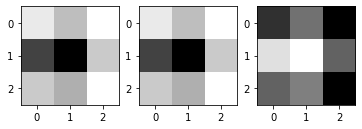

In [33]:
# conv2d : 3 filters, padding = 'SAME' (zero padding 함)
# image : (1,3,3,1), Filter: (2,2,1,3), stride : (1,1)
# 3장의 필터를 사용하여 출력도 3장 출력
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img)  # (1,3,3,3)
conv2d_img = np.swapaxes(conv2d_img,0,3)
print(conv2d_img)  # (3,3,3,1)

# 시각화
for i, one_imge in enumerate(conv2d_img):
    plt.subplot(1,3,i+1)
    plt.imshow(one_imge.reshape(3,3),cmap='Greys')
plt.show()

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


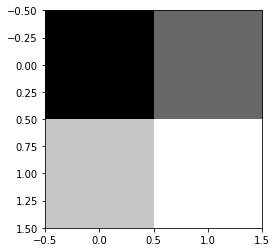

In [11]:
# max pooling : (1,2,2,1) ---> (1,2,2,1)  , padding = 'SAME' (zero padding 함)
image = np.array([[[[4],[3]],
                  [[2],[1]]]],dtype=np.float32)
print(image)
plt.imshow(image.reshape(2,2),cmap='Greys')
plt.show()

In [13]:
#  padding = 'VALID'
# max pool 
# image : (1,2,2,1)
# (2 - 2)/1 + 1 = 1
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],  # ksize : 원본에서 추출할 이미지의 범위
                     padding = 'VALID')
print(pool)
pool.eval()     # (1, 1, 1, 1)

Tensor("MaxPool_1:0", shape=(1, 1, 1, 1), dtype=float32)


array([[[[4.]]]], dtype=float32)

In [14]:
#  padding = 'VALID'
# max pool 
# image : (1,2,2,1)
# (3 - 2)/1 + 1 = 2
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],  # ksize : 원본에서 추출할 이미지의 범위
                     padding = 'SAME')
print(pool)
pool.eval()  # (1, 2, 2, 1)

Tensor("MaxPool_2:0", shape=(1, 2, 2, 1), dtype=float32)


array([[[[4.],
         [3.]],

        [[2.],
         [1.]]]], dtype=float32)

Extracting Data/mnist/train-images-idx3-ubyte.gz
Extracting Data/mnist/train-labels-idx1-ubyte.gz
Extracting Data/mnist/t10k-images-idx3-ubyte.gz
Extracting Data/mnist/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


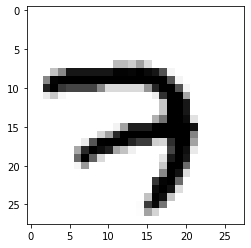

In [35]:
# MNIST image data 처리
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('Data/mnist/', one_hot=True)

image = mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0])  # [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] : 7

plt.imshow(image,cmap='Greys')
plt.show()

(1, 28, 28, 1)
(1, 14, 14, 5)
(5, 14, 14, 1)


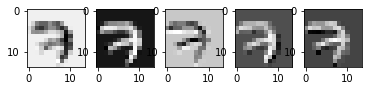

In [41]:
# MNIST Convolution layer
# image : (1,28,28,1)
# filter : (3,3,1,5)
# (28+1 - 3)/2 + 1 = 14
img = image.reshape(-1,28,28,1)
print(img.shape)

W = tf.Variable(tf.random_normal([3,3,1,5]),name='weight')
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1], padding='SAME')

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
print(conv2d_img.shape) # (1, 14, 14, 5)
conv2d_img = np.swapaxes(conv2d_img,0,3)
print(conv2d_img.shape) # (5, 14, 14, 1)


# 시각화
for i, one_imge in enumerate(conv2d_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_imge.reshape(14,14),cmap='Greys')
plt.show()

(1, 7, 7, 5)
(5, 7, 7, 1)


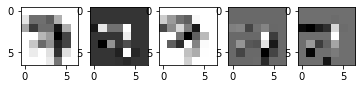

In [42]:
# MNIST Max Pooling
# conv2d : (1, 14, 14, 5)
# kernel size : (1,2,2,1) , strides : (1,2,2,1), padding = 'SAME'
# 출력 이미지 : (14+1 - 2)/2 + 1 = 7, 

pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1], strides=[1,2,2,1],
                      padding='SAME')
pool_img = pool.eval()
print(pool_img.shape)  # (1,7,7,5)

pool_img = np.swapaxes(pool_img,0,3)
print(pool_img.shape) # (5, 7, 7, 1)

# 시각화
for i, one_imge in enumerate(pool_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_imge.reshape(7,7),cmap='Greys')
plt.show()